In [23]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

In [24]:
df = pd.read_csv('Dataset_Car.csv', encoding='ISO-8859-1')

In [25]:
df.head()

,customer name,customer e-mail,country,gender,age,annual Salary,credit card debt,net worth,car purchase amount
0,Martina Avila,cubilia.Curae.Phasellus@quisaccumsanconvallis.edu,Bulgaria,0,41.851720,62812.09301,11609.380910,238961.2505,35321.45877
1,Harlan Barnes,eu.dolor@diam.co.uk,Belize,0,40.870623,66646.89292,9572.957136,530973.9078,45115.52566
2,Naomi Rodriquez,vulputate.mauris.sagittis@ametconsectetueradip...,Algeria,1,43.152897,53798.55112,11160.355060,638467.1773,42925.70921
3,Jade Cunningham,malesuada@dignissim.com,Cook Islands,1,58.271369,79370.03798,14426.164850,548599.0524,67422.36313
4,Cedric Leach,felis.ullamcorper.viverra@egetmollislectus.net,Brazil,1,57.313749,59729.15130,5358.712177,560304.0671,55915.46248


In [26]:
df.tail()

,customer name,customer e-mail,country,gender,age,annual Salary,credit card debt,net worth,car purchase amount
495,Walter,ligula@Cumsociis.ca,Nepal,0,41.462515,71942.40291,6995.902524,541670.1016,48901.44342
496,Vanna,Cum.sociis.natoque@Sedmolestie.edu,Zimbabwe,1,37.642000,56039.49793,12301.456790,360419.0988,31491.41457
497,Pearl,penatibus.et@massanonante.com,Philippines,1,53.943497,68888.77805,10611.606860,764531.3203,64147.28888
498,Nell,Quisque.varius@arcuVivamussit.net,Botswana,1,59.160509,49811.99062,14013.034510,337826.6382,45442.15353
499,Marla,Camaron.marla@hotmail.com,marlal,1,46.731152,61370.67766,9391.341628,462946.4924,45107.22566


In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   customer name        500 non-null    object 
 1   customer e-mail      500 non-null    object 
 2   country              500 non-null    object 
 3   gender               500 non-null    int64  
 4   age                  500 non-null    float64
 5   annual Salary        500 non-null    float64
 6   credit card debt     500 non-null    float64
 7   net worth            500 non-null    float64
 8   car purchase amount  500 non-null    float64
dtypes: float64(5), int64(1), object(3)
memory usage: 35.3+ KB


In [28]:
df['gender'] = df['gender'].astype('category')
df.dtypes

customer name            object
customer e-mail          object
country                  object
gender                 category
age                     float64
annual Salary           float64
credit card debt        float64
net worth               float64
car purchase amount     float64
dtype: object

In [29]:
df.drop_duplicates(inplace=True)
df.shape

(500, 9)

In [30]:
df.describe()

,age,annual Salary,credit card debt,net worth,car purchase amount
count,500.000000,500.000000,500.000000,500.000000,500.000000
mean,46.241674,62127.239608,9607.645049,431475.713625,44209.799218
std,7.978862,11703.378228,3489.187973,173536.756340,10773.178744
min,20.000000,20000.000000,100.000000,20000.000000,9000.000000
25%,40.949969,54391.977195,7397.515792,299824.195900,37629.896040
50%,46.049901,62915.497035,9655.035568,426750.120650,43997.783390
75%,51.612263,70117.862005,11798.867487,557324.478725,51254.709517
max,70.000000,100000.000000,20000.000000,1000000.000000,80000.000000


In [31]:
df['country'].nunique()

211

In [32]:
df['country'].unique()

array(['Bulgaria', 'Belize', 'Algeria', 'Cook Islands', 'Brazil',
       'Liberia', 'Syria', 'Czech Republic', 'Armenia', 'Somalia',
       'Sint Maarten', 'Greenland', 'Nicaragua', 'Palestine, State of',
       'United Arab Emirates', 'Gabon', 'Tokelau', 'Portugal', 'Chad',
       'Iraq', 'Sudan', 'Angola', 'Nigeria', 'Madagascar', 'Macedonia',
       'Oman', 'Colombia', 'Namibia', 'Denmark', 'Dominican Republic',
       'Costa Rica', 'Botswana', 'Saint Pierre and Miquelon', 'France',
       'Senegal', 'Cambodia', 'Suriname', 'Turkey', 'Ethiopia',
       'French Guiana', 'Bhutan', 'Georgia', 'Mozambique', 'Nauru',
       'Timor-Leste', 'Djibouti', 'Argentina', 'Taiwan', 'Åland Islands',
       'Turks and Caicos Islands', 'Samoa', 'Vanuatu', 'Mongolia',
       'Sri Lanka', 'Guinea-Bissau', 'Egypt', 'Slovenia', 'Benin',
       'Cape Verde', 'Paraguay', 'Laos', 'Iceland', 'Viet Nam',
       'Marshall Islands', 'Germany', 'Kyrgyzstan', 'Mauritius', 'Gambia',
       'Reunion', 'Jordan', 'S

# Countries preprocessing

In [33]:
country_mapping = {
    'Viet Nam': 'Vietnam',
    'Macao': 'Macau',
    'Virgin Islands, British': 'British Virgin Islands',
    'Congo (Brazzaville)': 'Congo',
    'Virgin Islands, United States': 'United States Virgin Islands',
    'Korea, South': 'South Korea',
    'marlal': 'Kenya',
    'United Kingdom (Great Britain)': 'United Kingdom',
    'Heard Island and Mcdonald Islands':'Heard Island and McDonald Islands',
    'Reunion':'Réunion',
    'Saint Vincent and The Grenadines':'Saint Vincent and the Grenadines',
    'South Georgia and The South Sandwich Islands':'South Georgia and the South Sandwich Islands',
    'Sint Maarten':'Saint Martin'
}

df['country'] = df['country'].replace(country_mapping)

In [34]:
df['country'].nunique()

209

In [35]:
from pycountry_convert import country_alpha2_to_continent_code, country_name_to_country_alpha2
def get_country_code_and_continent(col):
    try:
        cn_a2_code =  country_name_to_country_alpha2(col)
    except:
        cn_a2_code = 'Unknown' 
    try:
        cn_continent = country_alpha2_to_continent_code(cn_a2_code)
    except:
        cn_continent = 'Unknown' 
    return pd.Series([cn_a2_code, cn_continent])

df[['country_code', 'continent']] = df['country'].apply(get_country_code_and_continent)

df

,customer name,customer e-mail,country,gender,age,annual Salary,credit card debt,net worth,car purchase amount,country_code,continent
0,Martina Avila,cubilia.Curae.Phasellus@quisaccumsanconvallis.edu,Bulgaria,0,41.851720,62812.09301,11609.380910,238961.2505,35321.45877,BG,EU
1,Harlan Barnes,eu.dolor@diam.co.uk,Belize,0,40.870623,66646.89292,9572.957136,530973.9078,45115.52566,BZ,NA
2,Naomi Rodriquez,vulputate.mauris.sagittis@ametconsectetueradip...,Algeria,1,43.152897,53798.55112,11160.355060,638467.1773,42925.70921,DZ,AF
3,Jade Cunningham,malesuada@dignissim.com,Cook Islands,1,58.271369,79370.03798,14426.164850,548599.0524,67422.36313,CK,OC
4,Cedric Leach,felis.ullamcorper.viverra@egetmollislectus.net,Brazil,1,57.313749,59729.15130,5358.712177,560304.0671,55915.46248,BR,SA
...,...,...,...,...,...,...,...,...,...,...,...
495,Walter,ligula@Cumsociis.ca,Nepal,0,41.462515,71942.40291,6995.902524,541670.1016,48901.44342,NP,AS
496,Vanna,Cum.sociis.natoque@Sedmolestie.edu,Zimbabwe,1,37.642000,56039.49793,12301.456790,360419.0988,31491.41457,ZW,AF
497,Pearl,penatibus.et@massanonante.com,Philippines,1,53.943497,68888.77805,10611.606860,764531.3203,64147.28888,PH,AS
498,Nell,Quisque.varius@arcuVivamussit.net,Botswana,1,59.160509,49811.99062,14013.034510,337826.6382,45442.15353,BW,AF


In [36]:
df['country_code'].value_counts()

country_code
BO    6
IL    6
MR    6
GL    5
KG    5
     ..
SS    1
UA    1
NZ    1
SH    1
MY    1
Name: count, Length: 209, dtype: int64

In [37]:
df[df['country_code'] == 'Unknown'][['country', 'country_code']]

,country,country_code


In [38]:
df['continent'].value_counts()

continent
AF         115
AS         110
NA          83
EU          81
OC          54
SA          40
Unknown     12
AN           5
Name: count, dtype: int64

In [39]:
df[df['continent'] == 'Unknown'][['country', 'continent']]

,country,continent
45,Timor-Leste,Unknown
75,United States Minor Outlying Islands,Unknown
152,Timor-Leste,Unknown
209,Timor-Leste,Unknown
255,French Southern Territories,Unknown
338,United States Minor Outlying Islands,Unknown
342,Western Sahara,Unknown
380,Antarctica,Unknown
381,Western Sahara,Unknown
411,Antarctica,Unknown


In [40]:
continent_mapping = {
    'Timor-Leste':'AS',
    'United States Minor Outlying Islands': 'NA',
    'French Southern Territories':'AN',
    'Western Sahara':'AF',
    'Antarctica':'AN'
}

def update_continent(row):
    if row['continent'] == 'Unknown' and row['country'] in continent_mapping:
        return continent_mapping[row['country']]
    return row['continent']

df['continent'] = df.apply(update_continent, axis=1)

In [41]:
df['continent'].value_counts()

continent
AF    117
AS    113
NA     86
EU     81
OC     54
SA     40
AN      9
Name: count, dtype: int64

In [42]:
df[df['continent'] == 'Unknown'][['country', 'continent']]

,country,continent


In [45]:
from geopy.geocoders import Nominatim

def get_coordinates(country):
    try:
        geolocator = Nominatim(user_agent="mohammed_hany_linear_project_orange")
        location = geolocator.geocode(country)
        return location.latitude, location.longitude
    except AttributeError:  
        return None, None

df[['latitude', 'longitude']] = df['country_code'].apply(get_coordinates).apply(pd.Series)

In [46]:
df

,customer name,customer e-mail,country,gender,age,annual Salary,credit card debt,net worth,car purchase amount,country_code,continent,latitude,longitude
0,Martina Avila,cubilia.Curae.Phasellus@quisaccumsanconvallis.edu,Bulgaria,0,41.851720,62812.09301,11609.380910,238961.2505,35321.45877,BG,EU,42.607397,25.485662
1,Harlan Barnes,eu.dolor@diam.co.uk,Belize,0,40.870623,66646.89292,9572.957136,530973.9078,45115.52566,BZ,NA,17.120494,-88.685903
2,Naomi Rodriquez,vulputate.mauris.sagittis@ametconsectetueradip...,Algeria,1,43.152897,53798.55112,11160.355060,638467.1773,42925.70921,DZ,AF,28.000027,2.999983
3,Jade Cunningham,malesuada@dignissim.com,Cook Islands,1,58.271369,79370.03798,14426.164850,548599.0524,67422.36313,CK,OC,-19.996972,-157.785871
4,Cedric Leach,felis.ullamcorper.viverra@egetmollislectus.net,Brazil,1,57.313749,59729.15130,5358.712177,560304.0671,55915.46248,BR,SA,-10.333333,-53.200000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,Walter,ligula@Cumsociis.ca,Nepal,0,41.462515,71942.40291,6995.902524,541670.1016,48901.44342,NP,AS,28.378046,83.999990
496,Vanna,Cum.sociis.natoque@Sedmolestie.edu,Zimbabwe,1,37.642000,56039.49793,12301.456790,360419.0988,31491.41457,ZW,AF,-18.455496,29.746841
497,Pearl,penatibus.et@massanonante.com,Philippines,1,53.943497,68888.77805,10611.606860,764531.3203,64147.28888,PH,AS,12.750349,122.731210
498,Nell,Quisque.varius@arcuVivamussit.net,Botswana,1,59.160509,49811.99062,14013.034510,337826.6382,45442.15353,BW,AF,-23.168178,24.592874


In [47]:
df[['latitude', 'longitude']].isnull().sum()

latitude     0
longitude    0
dtype: int64

Total purchase over countries

In [168]:
import folium
from branca.colormap import linear

df_grouped = df.groupby(['country', 'latitude', 'longitude'], as_index=False)['car purchase amount'].sum()

world_map = folium.Map(location=[20, 0], zoom_start=2, tiles='cartodbpositron')

color_scale = linear.GnBu_09.scale(df_grouped['car purchase amount'].min(), df_grouped['car purchase amount'].max())
color_scale.caption = 'Total Car Purchase Amount'


for i in range(len(df_grouped)):
    folium.CircleMarker(
        location=[df_grouped.iloc[i]['latitude'], df_grouped.iloc[i]['longitude']],
        radius=10,
        color=color_scale(df_grouped.iloc[i]['car purchase amount']),
        fill=True,
        fill_color=color_scale(df_grouped.iloc[i]['car purchase amount']),
        fill_opacity=0.7,
        popup=folium.Popup(f"Country: {df_grouped.iloc[i]['country']}<br>Total Purchase: {df_grouped.iloc[i]['car purchase amount']}", max_width=300)
    ).add_to(world_map)

color_scale.add_to(world_map)

world_map


Average purchases over countries

In [167]:
from branca.colormap import linear

df_grouped = df.groupby(['country', 'latitude', 'longitude'], as_index=False)['car purchase amount'].mean()

world_map = folium.Map(location=[20, 0], zoom_start=2, tiles='cartodbpositron')

color_scale = linear.GnBu_09.scale(df_grouped['car purchase amount'].min(), df_grouped['car purchase amount'].max())
color_scale.caption = 'Average Car Purchase Amount'


for i in range(len(df_grouped)):
    folium.CircleMarker(
        location=[df_grouped.iloc[i]['latitude'], df_grouped.iloc[i]['longitude']],
        radius=10,
        color=color_scale(df_grouped.iloc[i]['car purchase amount']),
        fill=True,
        fill_color=color_scale(df_grouped.iloc[i]['car purchase amount']),
        fill_opacity=0.7,
        popup=folium.Popup(f"Country: {df_grouped.iloc[i]['country']}<br>Average Purchase: {df_grouped.iloc[i]['car purchase amount']}", max_width=300)
    ).add_to(world_map)

color_scale.add_to(world_map)

world_map


# What is the overall distribution of Car Purchase amount?

To calculate the needed amount of bins we can follow this rule: \
k > log_{2}(n) = log_{2}(500) = 8.96 \
k = 9 (where 9 > 8.96)

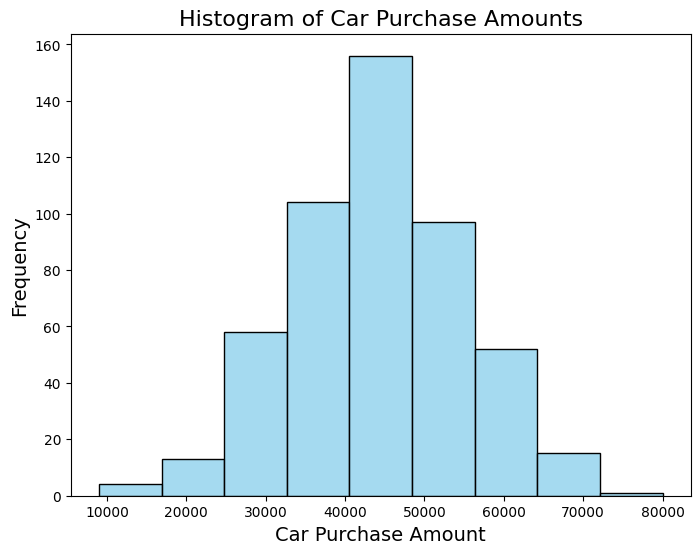

In [50]:
plt.figure(figsize=(8, 6))
sns.histplot(df['car purchase amount'], bins=9, kde=False, color='skyblue', edgecolor='black')
plt.title('Histogram of Car Purchase Amounts', fontsize=16)
plt.xlabel('Car Purchase Amount', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.show()


In [51]:
from scipy.stats import skew 

print(f"The skewness of the graph: {skew(df['car purchase amount'], axis=0, bias=True)}")

The skewness of the graph: -0.030698056003724793


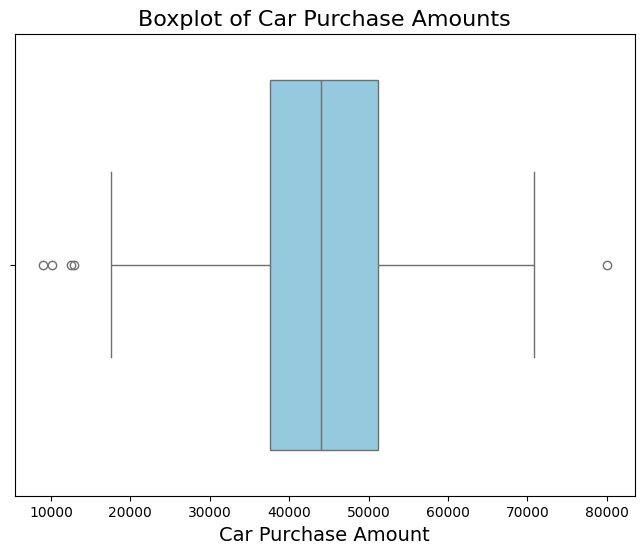

In [52]:
plt.figure(figsize=(8, 6))
sns.boxplot(x=df['car purchase amount'], color='skyblue')
plt.title('Boxplot of Car Purchase Amounts', fontsize=16)
plt.xlabel('Car Purchase Amount', fontsize=14)
plt.show()

It seems that the data is approximately symmetric with slight skewness to the left and it contains some outliers.

# How do Age, Annual Salary, and Net Worth influence Car Purchase Amount?

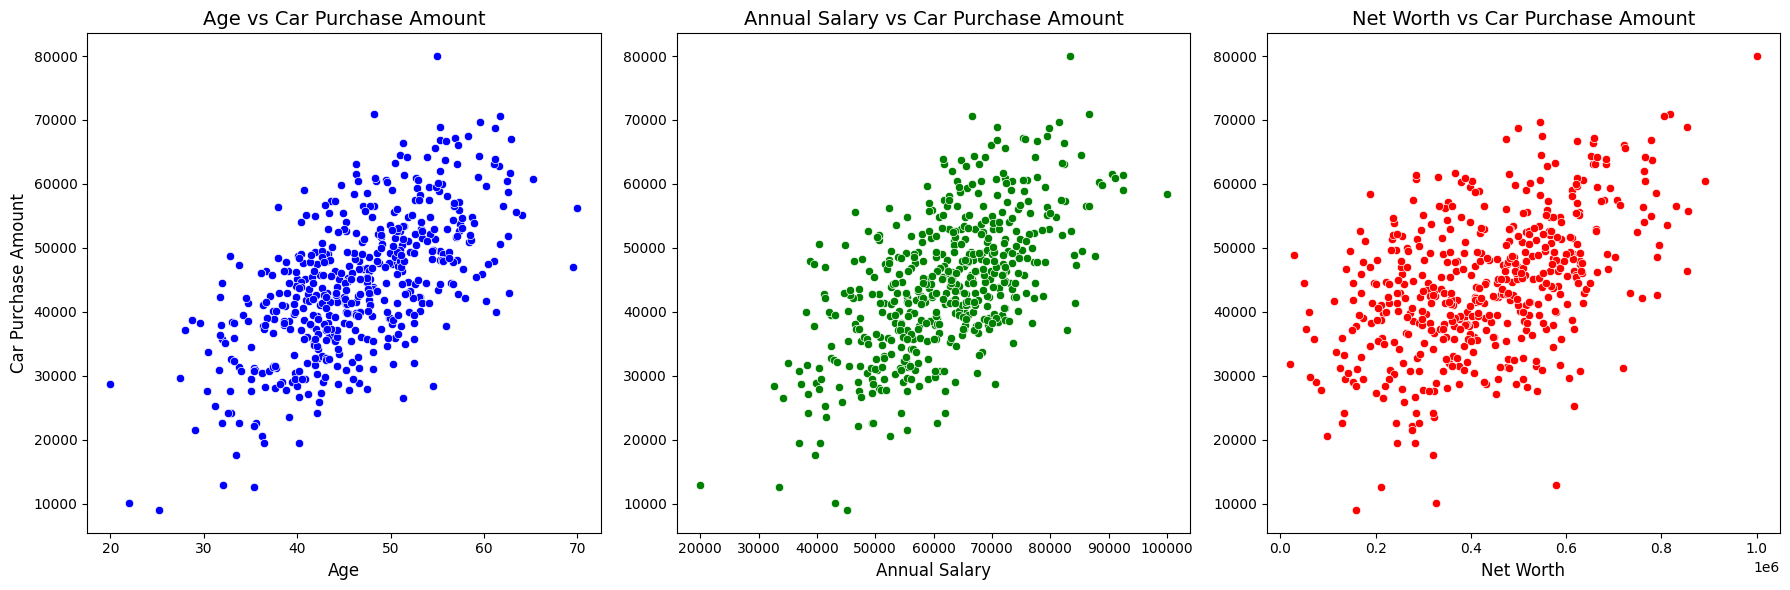

In [53]:
fig, axs = plt.subplots(1, 3, figsize=(18, 6))
sns.scatterplot(
    x='age', 
    y='car purchase amount', 
    data=df, 
    ax=axs[0], 
    color='blue'
)
axs[0].set_title('Age vs Car Purchase Amount', fontsize=14)
axs[0].set_xlabel('Age', fontsize=12)
axs[0].set_ylabel('Car Purchase Amount', fontsize=12)

sns.scatterplot(
    x='annual Salary', 
    y='car purchase amount', 
    data=df, 
    ax=axs[1], 
    color='green'
)
axs[1].set_title('Annual Salary vs Car Purchase Amount', fontsize=14)
axs[1].set_xlabel('Annual Salary', fontsize=12)
axs[1].set_ylabel('')

sns.scatterplot(
    x='net worth', 
    y='car purchase amount', 
    data=df, 
    ax=axs[2], 
    color='red'
)
axs[2].set_title('Net Worth vs Car Purchase Amount', fontsize=14)
axs[2].set_xlabel('Net Worth', fontsize=12)
axs[2].set_ylabel('')

plt.tight_layout()
plt.show()


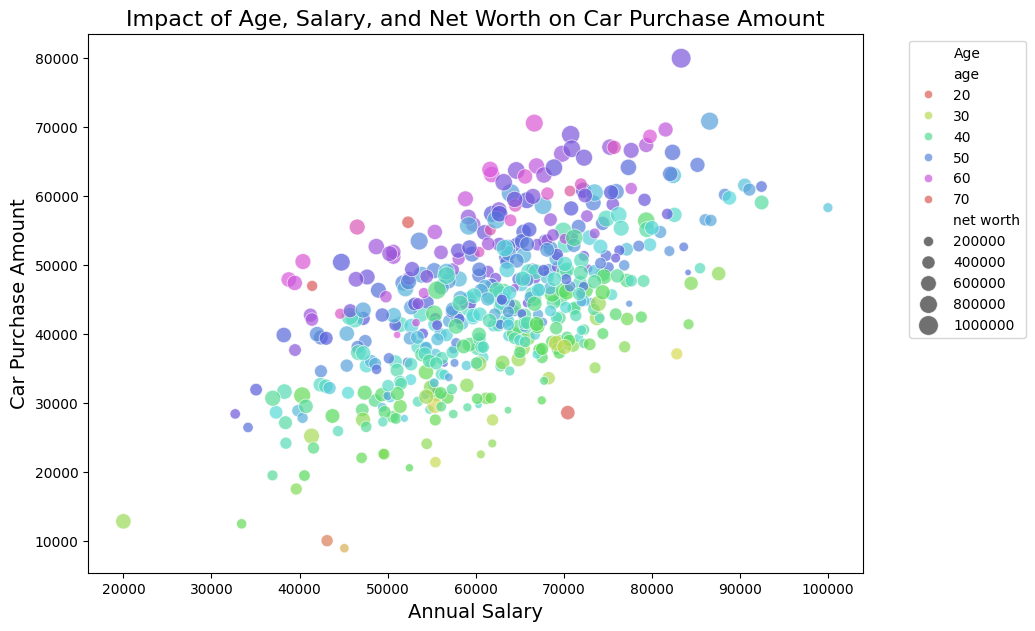

In [54]:
plt.figure(figsize=(10, 7))
sns.scatterplot(x='annual Salary', y='car purchase amount', hue='age', size='net worth', data=df, palette='hls', sizes=(20, 200), alpha=0.7)
plt.title('Impact of Age, Salary, and Net Worth on Car Purchase Amount', fontsize=16)
plt.xlabel('Annual Salary', fontsize=14)
plt.ylabel('Car Purchase Amount', fontsize=14)
plt.legend(title='Age', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

# Is there a difference in Car Purchase Amount based on Gender?

In [55]:
df['gender'].nunique()

2

In [56]:
df['gender name'] = df['gender'].map({0: 'Female', 1: 'Male'})

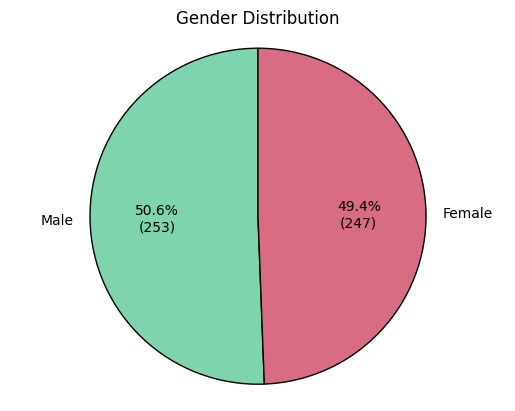

In [57]:
gender_counts = df['gender name'].value_counts()
colors = ['#7ED4AD', '#D76C82']
def autopct_format(pct, all_values):
    absolute = int(round(pct/100.*sum(all_values)))
    return f'{pct:.1f}%\n({absolute})'
plt.pie(
    gender_counts, 
    labels=gender_counts.index, 
    autopct=lambda pct: autopct_format(pct, gender_counts), 
    colors=colors, 
    startangle=90, 
    wedgeprops={'edgecolor': 'black'}
)
plt.title('Gender Distribution')
plt.axis('equal')
plt.show()

C:\Users\midoh\AppData\Local\Temp\ipykernel_12628\2431142840.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_grouped2 = df.groupby('gender name', as_index=False)['car purchase amount'].sum()


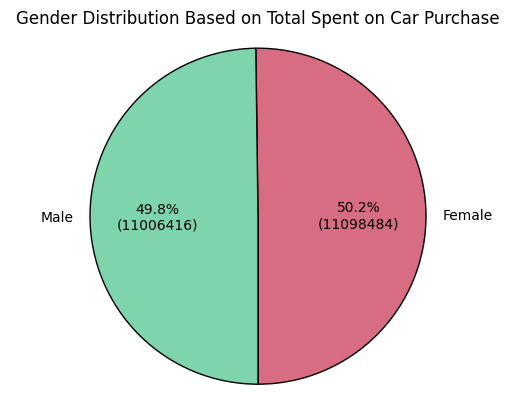

In [58]:
df_grouped2 = df.groupby('gender name', as_index=False)['car purchase amount'].sum()
colors = ['#D76C82', '#7ED4AD']
plt.pie(df_grouped2['car purchase amount'], labels=df_grouped2['gender name'], autopct=lambda pct: autopct_format(pct, df_grouped2['car purchase amount']), colors=colors, startangle=270, wedgeprops={'edgecolor': 'black'})
plt.title('Gender Distribution Based on Total Spent on Car Purchase')
plt.axis('equal')
plt.show()

C:\Users\midoh\AppData\Local\Temp\ipykernel_12628\2887758164.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_grouped2 = df.groupby('gender name', as_index=False)['car purchase amount'].mean()


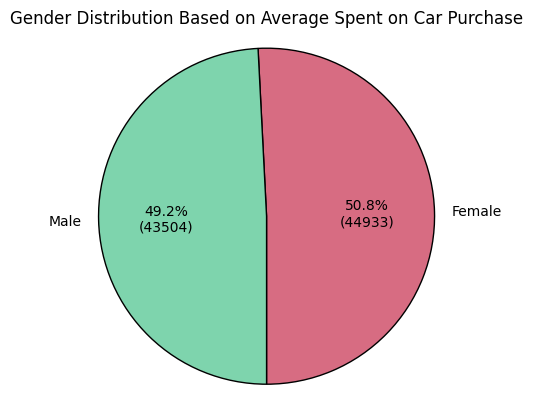

In [59]:
df_grouped2 = df.groupby('gender name', as_index=False)['car purchase amount'].mean()
colors = ['#D76C82', '#7ED4AD']
plt.pie(df_grouped2['car purchase amount'], labels=df_grouped2['gender name'], autopct=lambda pct: autopct_format(pct, df_grouped2['car purchase amount']), colors=colors, startangle=270, wedgeprops={'edgecolor': 'black'})
plt.title('Gender Distribution Based on Average Spent on Car Purchase')
plt.axis('equal')
plt.show()

# Is there a correlation between Credit Card Debt and Car Purchase Amount?

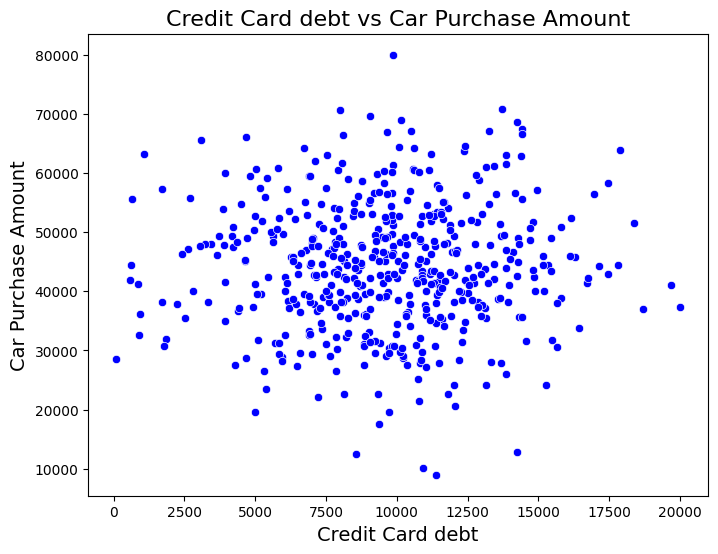

In [60]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='credit card debt', y='car purchase amount', data=df, color='blue')
plt.title('Credit Card debt vs Car Purchase Amount', fontsize=16)
plt.xlabel('Credit Card debt', fontsize=14)
plt.ylabel('Car Purchase Amount', fontsize=14)
plt.show()

In [61]:
print(f"correlation factor for credit card debt and car purchase amount: {df['credit card debt'].corr(df['car purchase amount'])}")

correlation factor for credit card debt and car purchase amount: 0.028882426561514143


It's completely random and a very weak correlation between the two columns

# Make data ready for modeling

In [151]:
linear_model_data = df.copy()
linear_model_data

,customer name,customer e-mail,country,gender,age,annual Salary,credit card debt,net worth,car purchase amount,country_code,continent,latitude,longitude,gender name
0,Martina Avila,cubilia.Curae.Phasellus@quisaccumsanconvallis.edu,Bulgaria,0,41.851720,62812.09301,11609.380910,238961.2505,35321.45877,BG,EU,42.607397,25.485662,Female
1,Harlan Barnes,eu.dolor@diam.co.uk,Belize,0,40.870623,66646.89292,9572.957136,530973.9078,45115.52566,BZ,NA,17.120494,-88.685903,Female
2,Naomi Rodriquez,vulputate.mauris.sagittis@ametconsectetueradip...,Algeria,1,43.152897,53798.55112,11160.355060,638467.1773,42925.70921,DZ,AF,28.000027,2.999983,Male
3,Jade Cunningham,malesuada@dignissim.com,Cook Islands,1,58.271369,79370.03798,14426.164850,548599.0524,67422.36313,CK,OC,-19.996972,-157.785871,Male
4,Cedric Leach,felis.ullamcorper.viverra@egetmollislectus.net,Brazil,1,57.313749,59729.15130,5358.712177,560304.0671,55915.46248,BR,SA,-10.333333,-53.200000,Male
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,Walter,ligula@Cumsociis.ca,Nepal,0,41.462515,71942.40291,6995.902524,541670.1016,48901.44342,NP,AS,28.378046,83.999990,Female
496,Vanna,Cum.sociis.natoque@Sedmolestie.edu,Zimbabwe,1,37.642000,56039.49793,12301.456790,360419.0988,31491.41457,ZW,AF,-18.455496,29.746841,Male
497,Pearl,penatibus.et@massanonante.com,Philippines,1,53.943497,68888.77805,10611.606860,764531.3203,64147.28888,PH,AS,12.750349,122.731210,Male
498,Nell,Quisque.varius@arcuVivamussit.net,Botswana,1,59.160509,49811.99062,14013.034510,337826.6382,45442.15353,BW,AF,-23.168178,24.592874,Male


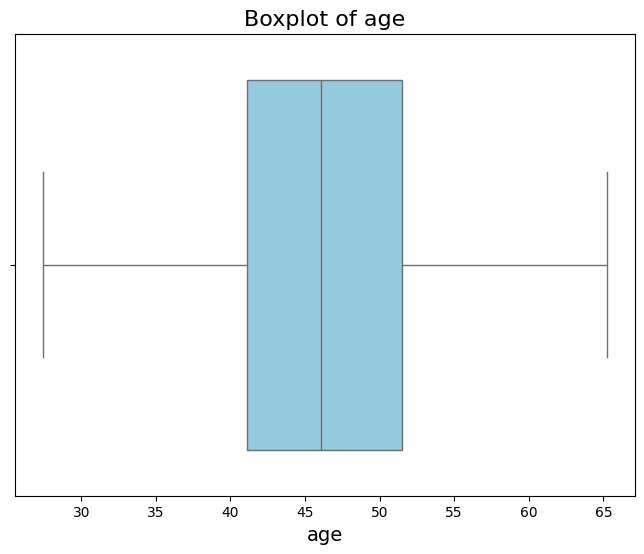

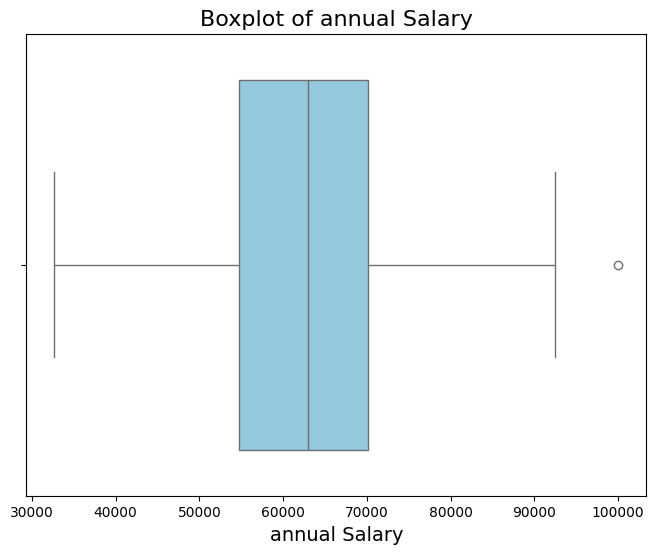

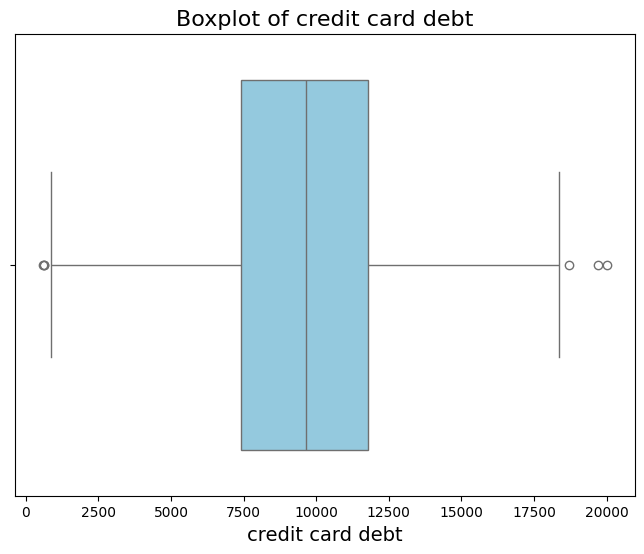

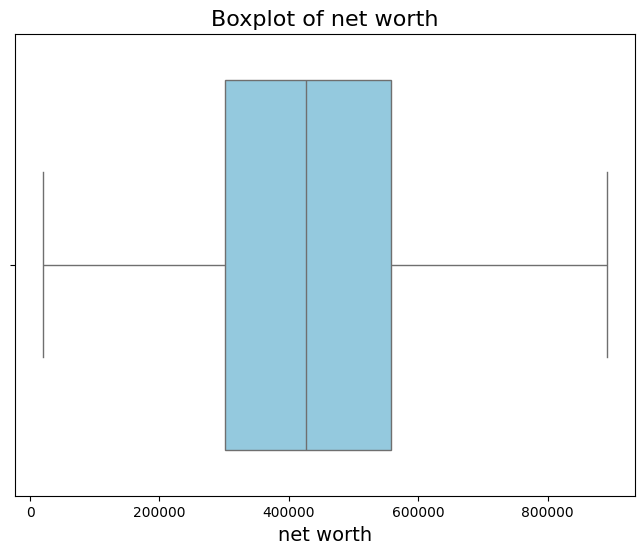

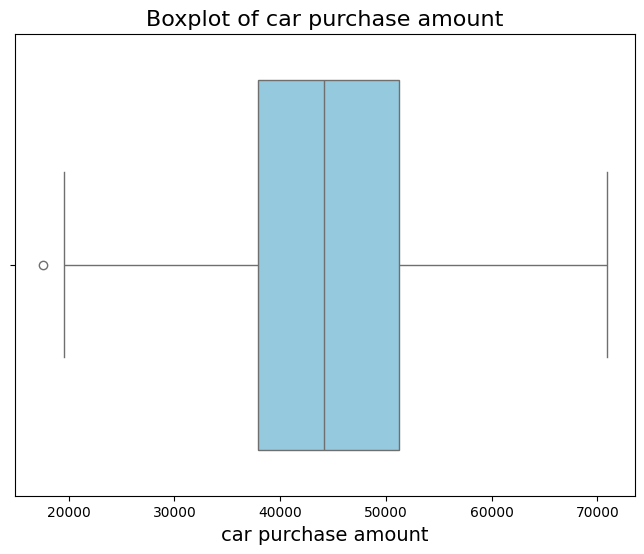

In [150]:
for col in ['age', 'annual Salary', 'credit card debt', 'net worth', 'car purchase amount']:
    plt.figure(figsize=(8, 6))
    sns.boxplot(x=col, data=linear_model_data, color='skyblue')
    plt.title(f'Boxplot of {col}', fontsize=16)
    plt.xlabel(col, fontsize=14)
    plt.show()

## remove outliers

In [152]:
for col in ['car purchase amount', 'age', 'net worth']:
    Q1 = linear_model_data[col].quantile(0.25)
    Q3 = linear_model_data[col].quantile(0.75)

    IQR = Q3 - Q1

    LB = Q1 - 1.5*IQR
    UB = Q3 + 1.5*IQR

    linear_model_data = linear_model_data[(linear_model_data[col] >= LB) & (linear_model_data[col] <= UB)]

linear_model_data.shape

(492, 14)

## Encoding categorical data

In [153]:
from sklearn.preprocessing import OneHotEncoder
linear_model_data['continent'] = linear_model_data['continent'].astype('category')
encoder = OneHotEncoder(sparse_output=False)
continent_encoded = encoder.fit_transform(linear_model_data[['continent']])
encoded_data = pd.DataFrame(continent_encoded, columns=encoder.categories_[0])
linear_model_data_encoded = pd.concat([linear_model_data.reset_index(drop=True), encoded_data], axis=1)
linear_model_data_encoded

,customer name,customer e-mail,country,gender,age,annual Salary,credit card debt,net worth,car purchase amount,country_code,...,latitude,longitude,gender name,AF,AN,AS,EU,NA,OC,SA
0,Martina Avila,cubilia.Curae.Phasellus@quisaccumsanconvallis.edu,Bulgaria,0,41.851720,62812.09301,11609.380910,238961.2505,35321.45877,BG,...,42.607397,25.485662,Female,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,Harlan Barnes,eu.dolor@diam.co.uk,Belize,0,40.870623,66646.89292,9572.957136,530973.9078,45115.52566,BZ,...,17.120494,-88.685903,Female,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,Naomi Rodriquez,vulputate.mauris.sagittis@ametconsectetueradip...,Algeria,1,43.152897,53798.55112,11160.355060,638467.1773,42925.70921,DZ,...,28.000027,2.999983,Male,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,Jade Cunningham,malesuada@dignissim.com,Cook Islands,1,58.271369,79370.03798,14426.164850,548599.0524,67422.36313,CK,...,-19.996972,-157.785871,Male,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,Cedric Leach,felis.ullamcorper.viverra@egetmollislectus.net,Brazil,1,57.313749,59729.15130,5358.712177,560304.0671,55915.46248,BR,...,-10.333333,-53.200000,Male,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
487,Walter,ligula@Cumsociis.ca,Nepal,0,41.462515,71942.40291,6995.902524,541670.1016,48901.44342,NP,...,28.378046,83.999990,Female,0.0,0.0,1.0,0.0,0.0,0.0,0.0
488,Vanna,Cum.sociis.natoque@Sedmolestie.edu,Zimbabwe,1,37.642000,56039.49793,12301.456790,360419.0988,31491.41457,ZW,...,-18.455496,29.746841,Male,1.0,0.0,0.0,0.0,0.0,0.0,0.0
489,Pearl,penatibus.et@massanonante.com,Philippines,1,53.943497,68888.77805,10611.606860,764531.3203,64147.28888,PH,...,12.750349,122.731210,Male,0.0,0.0,1.0,0.0,0.0,0.0,0.0
490,Nell,Quisque.varius@arcuVivamussit.net,Botswana,1,59.160509,49811.99062,14013.034510,337826.6382,45442.15353,BW,...,-23.168178,24.592874,Male,1.0,0.0,0.0,0.0,0.0,0.0,0.0


### There is no need to encode gender as it's encoded

In [154]:
linear_model_data_encoded.columns

Index(['customer name', 'customer e-mail', 'country', 'gender', 'age',
       'annual Salary', 'credit card debt', 'net worth', 'car purchase amount',
       'country_code', 'continent', 'latitude', 'longitude', 'gender name',
       'AF', 'AN', 'AS', 'EU', 'NA', 'OC', 'SA'],
      dtype='object')

In [155]:
linear_model_data_encoded.drop(columns=['customer name', 'customer e-mail', 'country', 'country_code', 'continent', 'latitude', 'longitude', 'gender name'], inplace=True)
linear_model_data_encoded.shape

(492, 13)

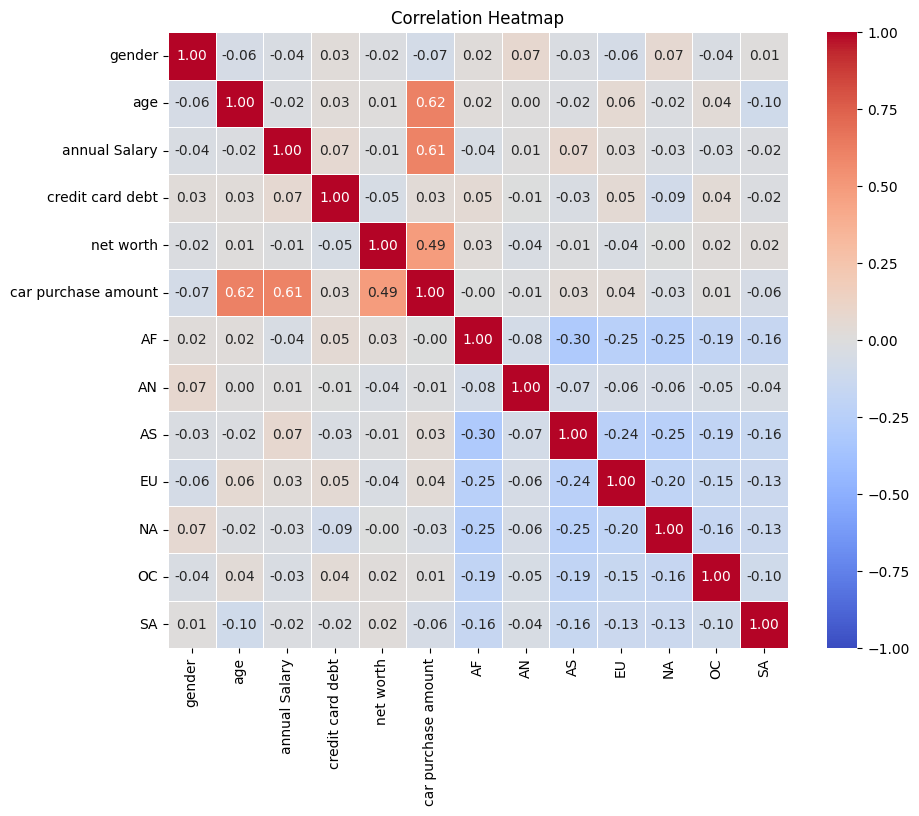

In [156]:
correlation_matrix = linear_model_data_encoded.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', vmin=-1, vmax=1, cbar=True, linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

# Start training the model

In [157]:
X = linear_model_data_encoded[['age', 'annual Salary', 'net worth']]
y = linear_model_data_encoded['car purchase amount']

In [158]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [159]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [160]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [161]:
y_pred = model.predict(X_test)

In [162]:
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

print(f'R-squared: {r2}')
print(f'Mean Squared Error: {mse}')

R-squared: 0.9999999834050766
Mean Squared Error: 1.8645382502599595


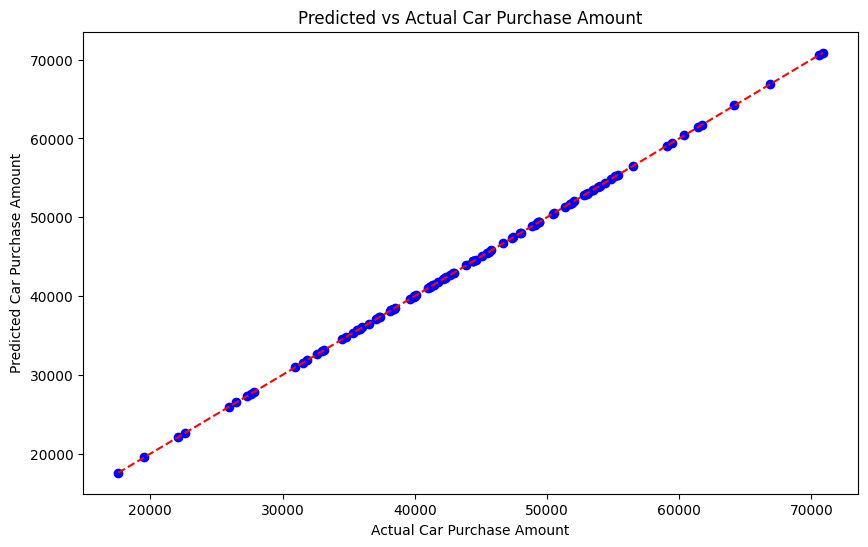

In [163]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.title('Predicted vs Actual Car Purchase Amount')
plt.xlabel('Actual Car Purchase Amount')
plt.ylabel('Predicted Car Purchase Amount')
plt.show()

In [164]:
y_train_pred = model.predict(X_train)
train_r2 = r2_score(y_train, y_train_pred)
train_mse = mean_squared_error(y_train, y_train_pred)

print(f'Training R-squared: {train_r2}')
print(f'Test R-squared: {r2}')
print(f'Training MSE: {train_mse}')
print(f'Test MSE: {mse}')


Training R-squared: 0.9999999779899607
Test R-squared: 0.9999999834050766
Training MSE: 2.278416821061168
Test MSE: 1.8645382502599595


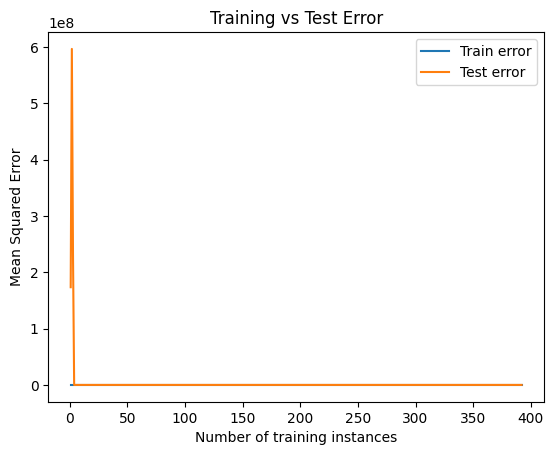

In [165]:
train_errors, test_errors = [], []

for m in range(1, len(X_train)):
    model.fit(X_train[:m], y_train[:m])
    train_error = mean_squared_error(y_train[:m], model.predict(X_train[:m]))
    test_error = mean_squared_error(y_test, model.predict(X_test))
    
    train_errors.append(train_error)
    test_errors.append(test_error)

plt.plot(range(1, len(X_train)), train_errors, label='Train error')
plt.plot(range(1, len(X_train)), test_errors, label='Test error')
plt.legend()
plt.title('Training vs Test Error')
plt.xlabel('Number of training instances')
plt.ylabel('Mean Squared Error')
plt.show()

In [166]:
from sklearn.model_selection import cross_val_score
cv_r2_scores = cross_val_score(model, X, y, cv=5, scoring='r2')
cv_mse_scores = cross_val_score(model, X, y, cv=5, scoring='neg_mean_squared_error')
cv_mse_scores = -cv_mse_scores

print("R-squared scores for each fold: ", cv_r2_scores)
print("Mean R-squared: ", np.mean(cv_r2_scores))
print("MSE scores for each fold: ", cv_mse_scores)
print("Mean MSE: ", np.mean(cv_mse_scores))

R-squared scores for each fold:  [0.99999998 0.99999998 0.99999997 0.99999997 0.99999999]
Mean R-squared:  0.9999999781764523
MSE scores for each fold:  [1.90964649 2.24818959 2.46256745 3.06117838 1.58519399]
Mean MSE:  2.2533551795188758
